# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [18]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text
import getpass
import seaborn as sns

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [14]:
username = "root"
host = "localhost"
port = "3306"
database = "wholesale_customers_data"

password = getpass.getpass("Enter the password for the 'root' user: ")

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")

try:
    with engine.connect() as connection:
        print("Successful connection!")
        
        query = text("SELECT * FROM wholesale_customers;")
        result = connection.execute(query)
    
        df = pd.DataFrame(result.fetchall(), columns=result.keys())
        
        display(df.head())
except Exception as e:
    print(f"Connection error: {e}")

Successful connection!


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [15]:
# Your code here:

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

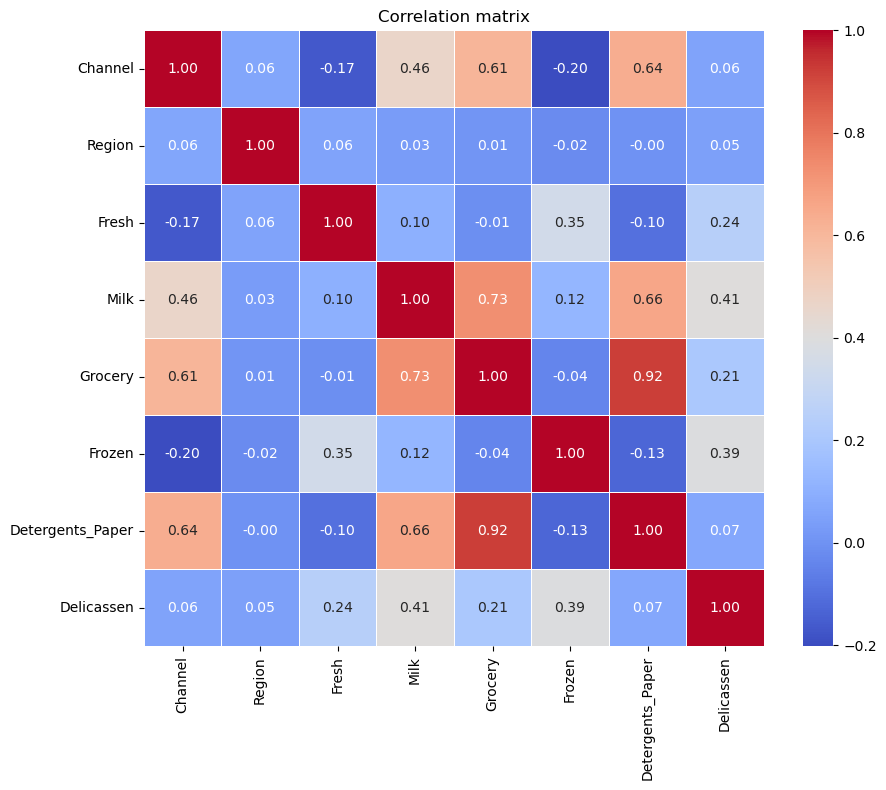

In [19]:
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

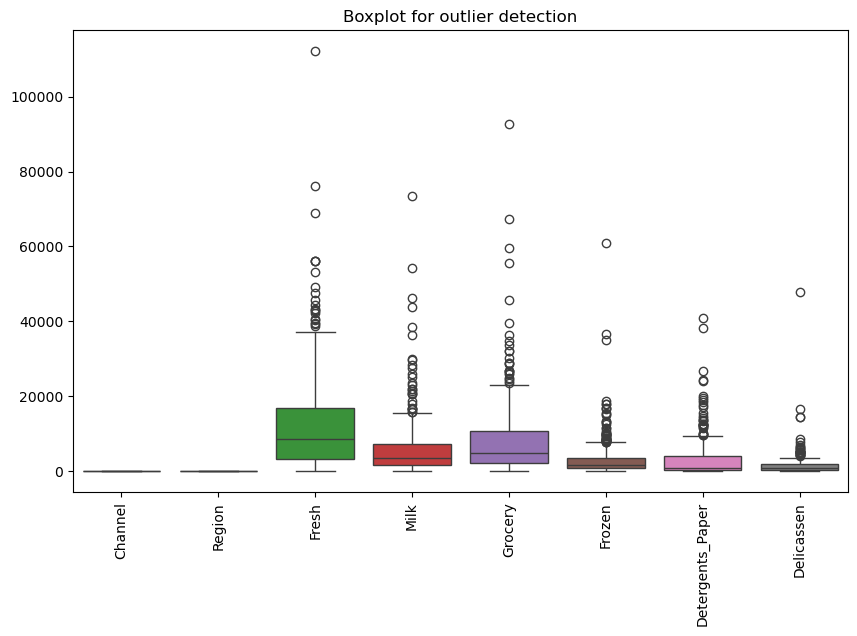

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for outlier detection")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Your observations here

# We saw the main values of describe(), also we noticed from the graph the correlations present between the columns. 
# No null values are present. I prefer not to summarize the outliers because they may be valid data.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [27]:
# Your code here

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [29]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

customers_scale = pd.concat([df[['Channel', 'Region']].reset_index(drop=True), df_scaled_numeric], axis=1)

customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [31]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(customers_scale)

labels = kmeans.labels_

df['labels'] = labels

label_counts = df['labels'].value_counts()




c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Count the values in `labels`.

In [32]:
# Your code here:

print("Cluster counting:")
print(label_counts)

Cluster counting:
labels
1    303
0    124
2     13
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [35]:
# Your code here

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(customers_scale)

labels_dbscan = dbscan.labels_

df['labels_DBSCAN'] = labels_dbscan


Count the values in `labels_DBSCAN`.

In [37]:
# Your code here

label_counts = df['labels_DBSCAN'].value_counts()
print("DBSCAN cluster count (including anomalies):")
print(label_counts)

DBSCAN cluster count (including anomalies):
labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

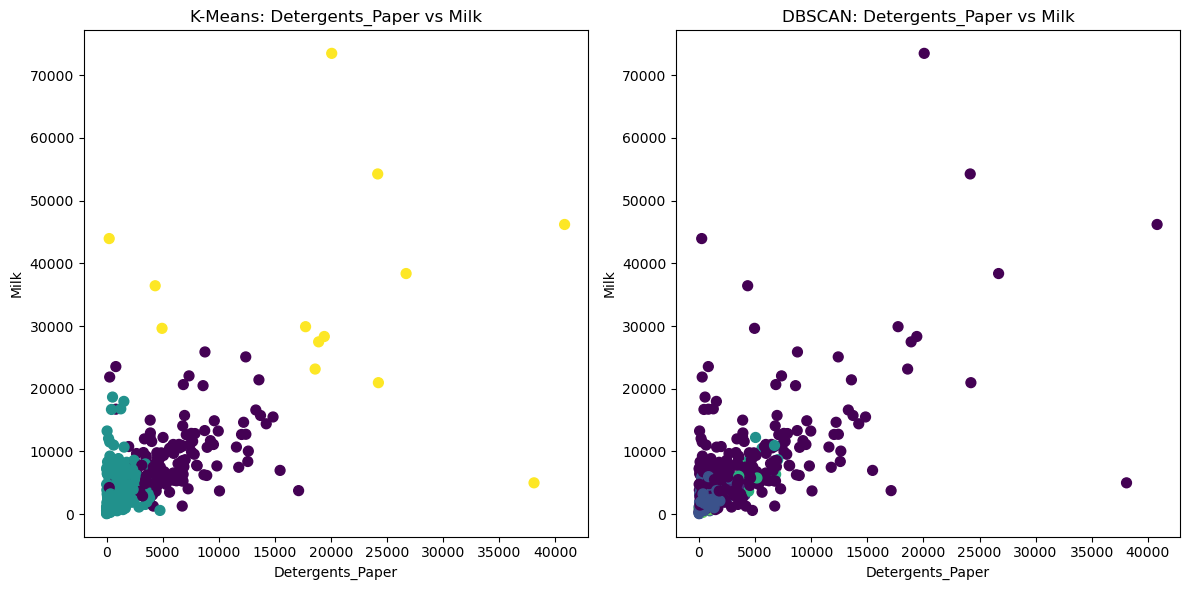

In [ ]:
# Your code here:


plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(df['Detergents_Paper'], df['Milk'], c=df['labels'], cmap='viridis', s=50)
plt.title("K-Means: Detergents_Paper vs Milk")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df['Detergents_Paper'], df['Milk'], c=df['labels_DBSCAN'], cmap='viridis', s=50)
plt.title("DBSCAN: Detergents_Paper vs Milk")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

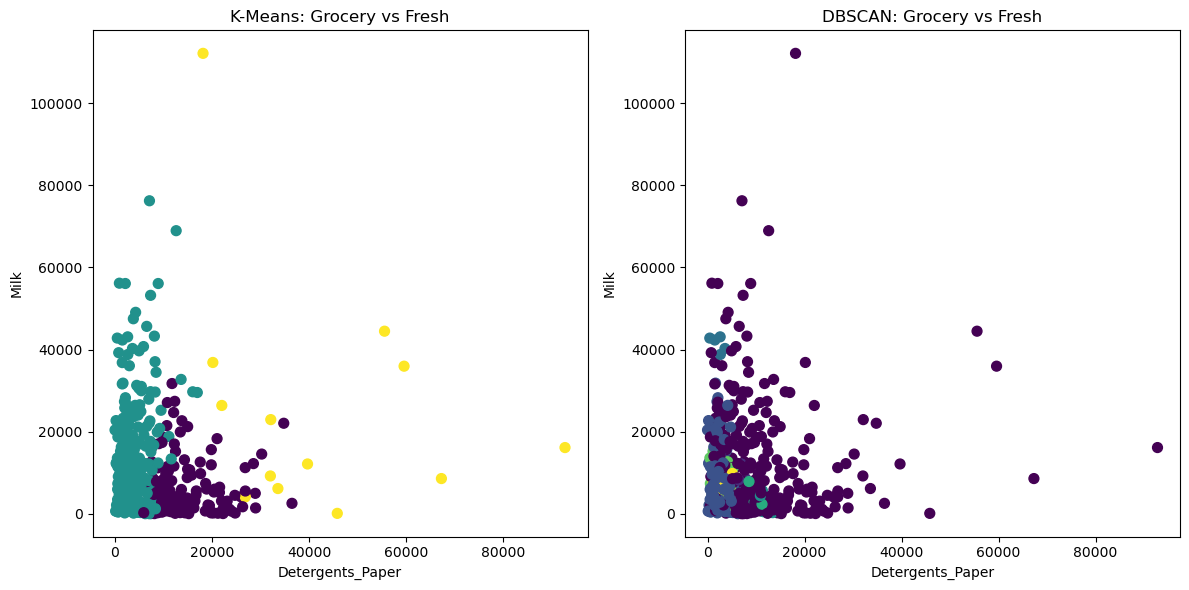

In [42]:
# Your code here:

plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(df['Grocery'], df['Fresh'], c=df['labels'], cmap='viridis', s=50)
plt.title("K-Means: Grocery vs Fresh")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df['Grocery'], df['Fresh'], c=df['labels_DBSCAN'], cmap='viridis', s=50)
plt.title("DBSCAN: Grocery vs Fresh")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

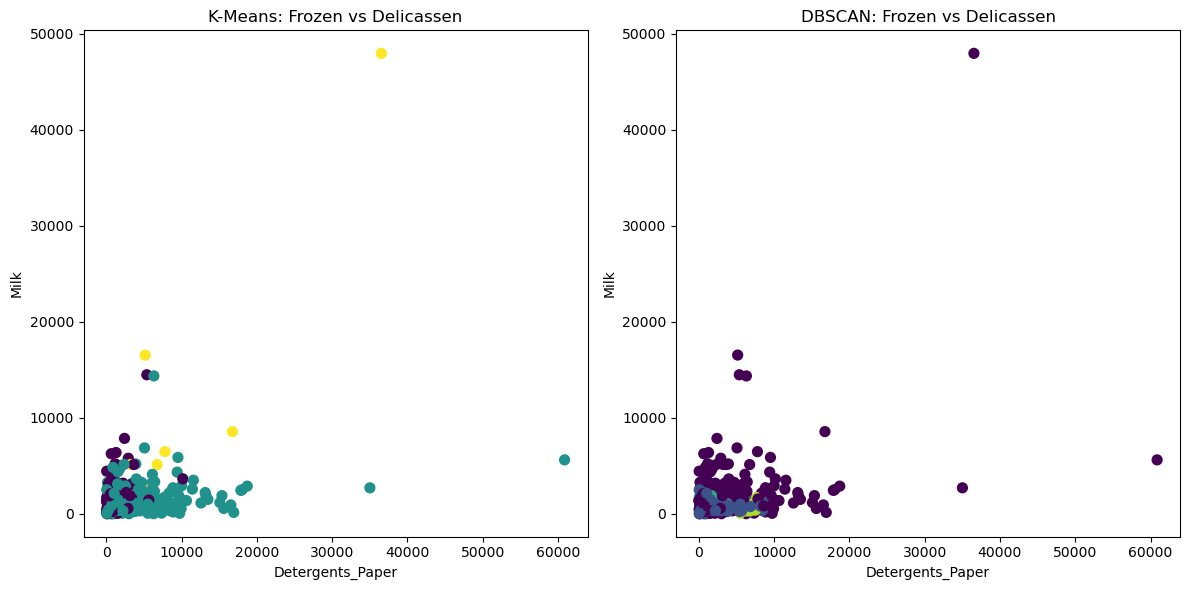

In [43]:
# Your code here:

plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(df['Frozen'], df['Delicassen'], c=df['labels'], cmap='viridis', s=50)
plt.title("K-Means: Frozen vs Delicassen")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df['Frozen'], df['Delicassen'], c=df['labels_DBSCAN'], cmap='viridis', s=50)
plt.title("DBSCAN: Frozen vs Delicassen")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:

kmeans_means = df.groupby('labels').mean()
print("K-Means cluster averages:")
print(kmeans_means)

dbscan_means = df.groupby('labels_DBSCAN').mean()
print("DBSCAN cluster averages:")
print(dbscan_means)


K-Means cluster averages:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.895161  2.612903   6699.483871   9407.274194  15021.185484   
1       1.066007  2.511551  13578.795380   3058.646865   3598.115512   
2       1.846154  2.615385  25770.769231  35160.384615  41977.384615   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       1385.282258       6358.596774  1671.169355      -0.540323  
1       3600.316832        729.752475  1192.323432       0.623762  
2       6844.538462      19867.384615  7880.307692      -1.000000  
DBSCAN cluster averages:
                Channel   Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0            

In [45]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(df_scaled, df['labels'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Silhouette score per DBSCAN (escludendo outlier con label -1)
silhouette_dbscan = silhouette_score(df_scaled[df['labels_DBSCAN'] != -1], df['labels_DBSCAN'][df['labels_DBSCAN'] != -1])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")


Silhouette Score for K-Means: 0.30997634921048617
Silhouette Score for DBSCAN: -0.12584335396176752


Which algorithm appears to perform better?

In [ ]:
# Your observations here

#Looking at all these observations I think between the two models K-means is better for this dataset

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here